In [11]:
import os
import sys
sys.path.append("..")
import process_db
import h5py
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import random
import TI as ti
import scanpy as sc
random.seed(1)

plt.rcParams["font.size"] = 20

In [12]:
import utils as utils
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

datasets = ["P0", "1469", "uterus"]
num = 0

if num == 0:
    rna = sc.read("/home/xcx/MYBenchmark-codes/11-MultiVI/mydata/P0/rna.h5ad")
    print(rna)
    atac = sc.read("/home/xcx/MYBenchmark-codes/11-MultiVI/mydata/P0/atac.h5ad")
    print(atac)
elif num == 1:
    rna = sc.read("/home/xcx/MYBenchmark-codes/11-MultiVI/mydata/1469/raw_rna.h5ad")
    print(rna)
    atac = sc.read("/home/xcx/MYBenchmark-codes/11-MultiVI/mydata/1469/atac.h5ad")
    print(atac)
else:
    rna = sc.read("/data1/xcx/unpaired-data/uterus/RNA/Uterus_Wang_2020_selected.h5ad", cache = True)
    atac = sc.read("/data1/xcx/unpaired-data/uterus/ATAC/uterus_Zhang2021/adata_anno_selected.h5ad", cache = True)
    print(rna)
    print(atac)

AnnData object with n_obs × n_vars = 5081 × 19322
    obs: 'barcode', 'cell_type', 'batch', 'modality'
    var: 'gene_id', 'modality'
AnnData object with n_obs × n_vars = 5081 × 229429
    obs: 'barcode', 'cell_type', 'batch', 'modality'
    var: 'region_id', 'modality'


/data1/xcx/anaconda3/envs/scDART/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/data1/xcx/anaconda3/envs/scDART/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


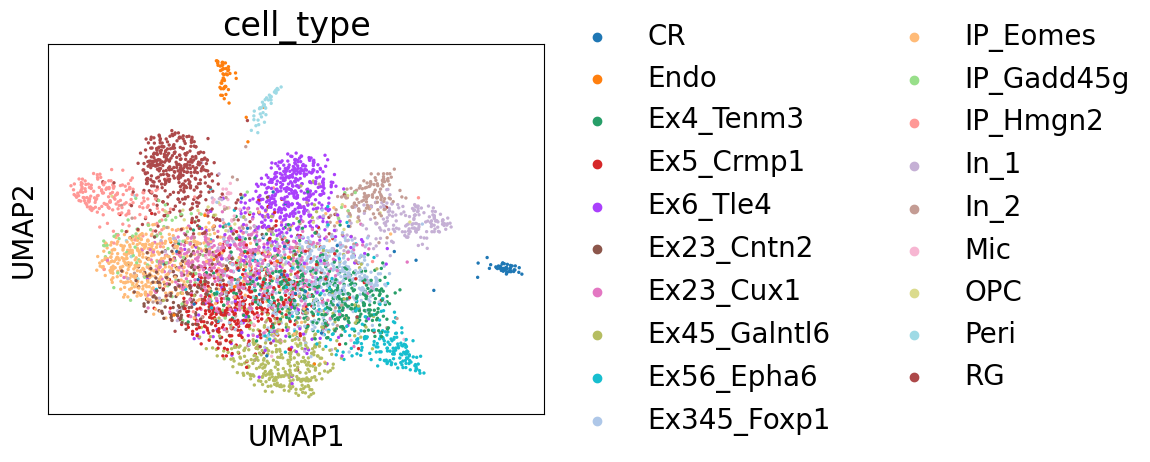

In [13]:
if num == 0:
    sc.pp.filter_cells(rna, min_genes=200)
    sc.pp.filter_genes(rna, min_cells=3)

    sc.pp.normalize_total(rna, target_sum=1e4)
    sc.pp.log1p(rna)

    sc.pp.highly_variable_genes(rna, min_mean=0.0125, max_mean=3, min_disp=0.5)

    rna.raw = rna

    rna =  rna[:, rna.var.highly_variable]
    
    sc.pp.scale(rna, max_value=10)

    sc.tl.pca(rna, svd_solver='arpack')
    sc.pp.neighbors(rna, n_neighbors=10, n_pcs=50)
    sc.tl.umap(rna)
    sc.pl.umap(rna, color="cell_type", show=False)
    
    colors_scanpy = rna.uns['cell_type_colors']
    
elif num == 1:
    sc.pp.normalize_total(rna, target_sum=1e4)
    sc.pp.log1p(rna)
    
    sc.pp.scale(rna, max_value=10)

    sc.tl.pca(rna, svd_solver='arpack')
    sc.pp.neighbors(rna, n_neighbors=10, n_pcs=50)
    sc.tl.umap(rna)
    sc.pl.umap(rna, color="cell_type", show=False)
    
    plt.savefig("/home/xcx/photos/data/" + datasets[num] + "_rna.png", dpi=500, bbox_inches='tight')
    plt.savefig("/home/xcx/photos/data/" + datasets[num] + "_rna.pdf", dpi=500, bbox_inches='tight')
    
elif num == 2:
    sc.pp.highly_variable_genes(rna, min_mean=0.0125, max_mean=3, min_disp=0.5)

    rna.raw = rna

    rna =  rna[:, rna.var.highly_variable]
    
    sc.pp.scale(rna, max_value=10)

    sc.tl.pca(rna, svd_solver='arpack')
    sc.pp.neighbors(rna, n_neighbors=10, n_pcs=50)
    sc.tl.umap(rna)
    sc.pl.umap(rna, color="cell_type", show=False)
    
    plt.savefig("/home/xcx/photos/data/" + datasets[num] + "_rna.png", dpi=500, bbox_inches='tight')
    plt.savefig("/home/xcx/photos/data/" + datasets[num] + "_rna.pdf", dpi=500, bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt

if num == 0:
    sc.pp.filter_cells(atac, min_genes=200)
    sc.pp.filter_genes(atac, min_cells=3)

    sc.pp.normalize_total(atac, target_sum=1e4)
    sc.pp.log1p(atac)

    sc.pp.highly_variable_genes(atac, min_mean=0.0125, max_mean=3, min_disp=0.5)

    atac.raw = atac

    atac =  atac[:, atac.var.highly_variable]
    
    sc.pp.scale(atac, max_value=10)

    sc.tl.pca(atac, svd_solver='arpack')
    sc.pp.neighbors(atac, n_neighbors=10, n_pcs=50)
    sc.tl.umap(atac)
    sc.pl.umap(atac, color="cell_type", show=False)
    
    plt.savefig("/home/xcx/photos/data/" + datasets[num] + "_atac.png", dpi=500, bbox_inches='tight')
    plt.savefig("/home/xcx/photos/data/" + datasets[num] + "_atac.pdf", dpi=500, bbox_inches='tight')
    
elif num == 1:
    sc.pp.normalize_total(atac, target_sum=1e4)
    sc.pp.log1p(atac)

    sc.tl.pca(atac, svd_solver='arpack')
    sc.pp.neighbors(atac, n_neighbors=10, n_pcs=50)
    sc.tl.umap(atac)
    sc.pl.umap(atac, color="cell_type", show=False)
    
    plt.savefig("/home/xcx/photos/data/" + datasets[num] + "_atac.png", dpi=500, bbox_inches='tight')
    plt.savefig("/home/xcx/photos/data/" + datasets[num] + "_atac.pdf", dpi=500, bbox_inches='tight')
    
elif num == 2:
    sc.tl.pca(atac, svd_solver='arpack')
    sc.pp.neighbors(atac, n_neighbors=10, n_pcs=50)
    sc.tl.umap(atac)
    sc.pl.umap(atac, color="celltype", palette = {"Endothelial cell": '#1f77b4', "Fibroblast": '#ff7f0e', "Macrophage": '#2ca02c', "Smooth muscle cell": '#d62728'}, show=False)
    
    plt.savefig("/home/xcx/photos/data/" + datasets[num] + "_atac.png", dpi=500, bbox_inches='tight')
    plt.savefig("/home/xcx/photos/data/" + datasets[num] + "_atac.pdf", dpi=500, bbox_inches='tight')
    
    sc.tl.pca(rna)
    sc.pp.neighbors(rna, n_neighbors=10, n_pcs=50)
    sc.tl.umap(rna)
    sc.pl.umap(rna, color="cell_type", palette = {"Endothelial cell": '#1f77b4', "Fibroblast": '#ff7f0e', "Macrophage": '#2ca02c', "Smooth muscle cell": '#d62728'}, show=False)
    
    plt.savefig("/home/xcx/photos/data/" + datasets[num] + "_rna.png", dpi=500, bbox_inches='tight')
    plt.savefig("/home/xcx/photos/data/" + datasets[num] + "_rna.pdf", dpi=500, bbox_inches='tight')

(5081, 50)
(5081, 50)
(10162, 50)
(5081, 2)
(5081, 2)
1
/home/xcx/photos/pdf/P0/12-GLUE_UMAP_modality.pdf
1
/home/xcx/photos/pdf/P0/12-GLUE_UMAP_separate.pdf


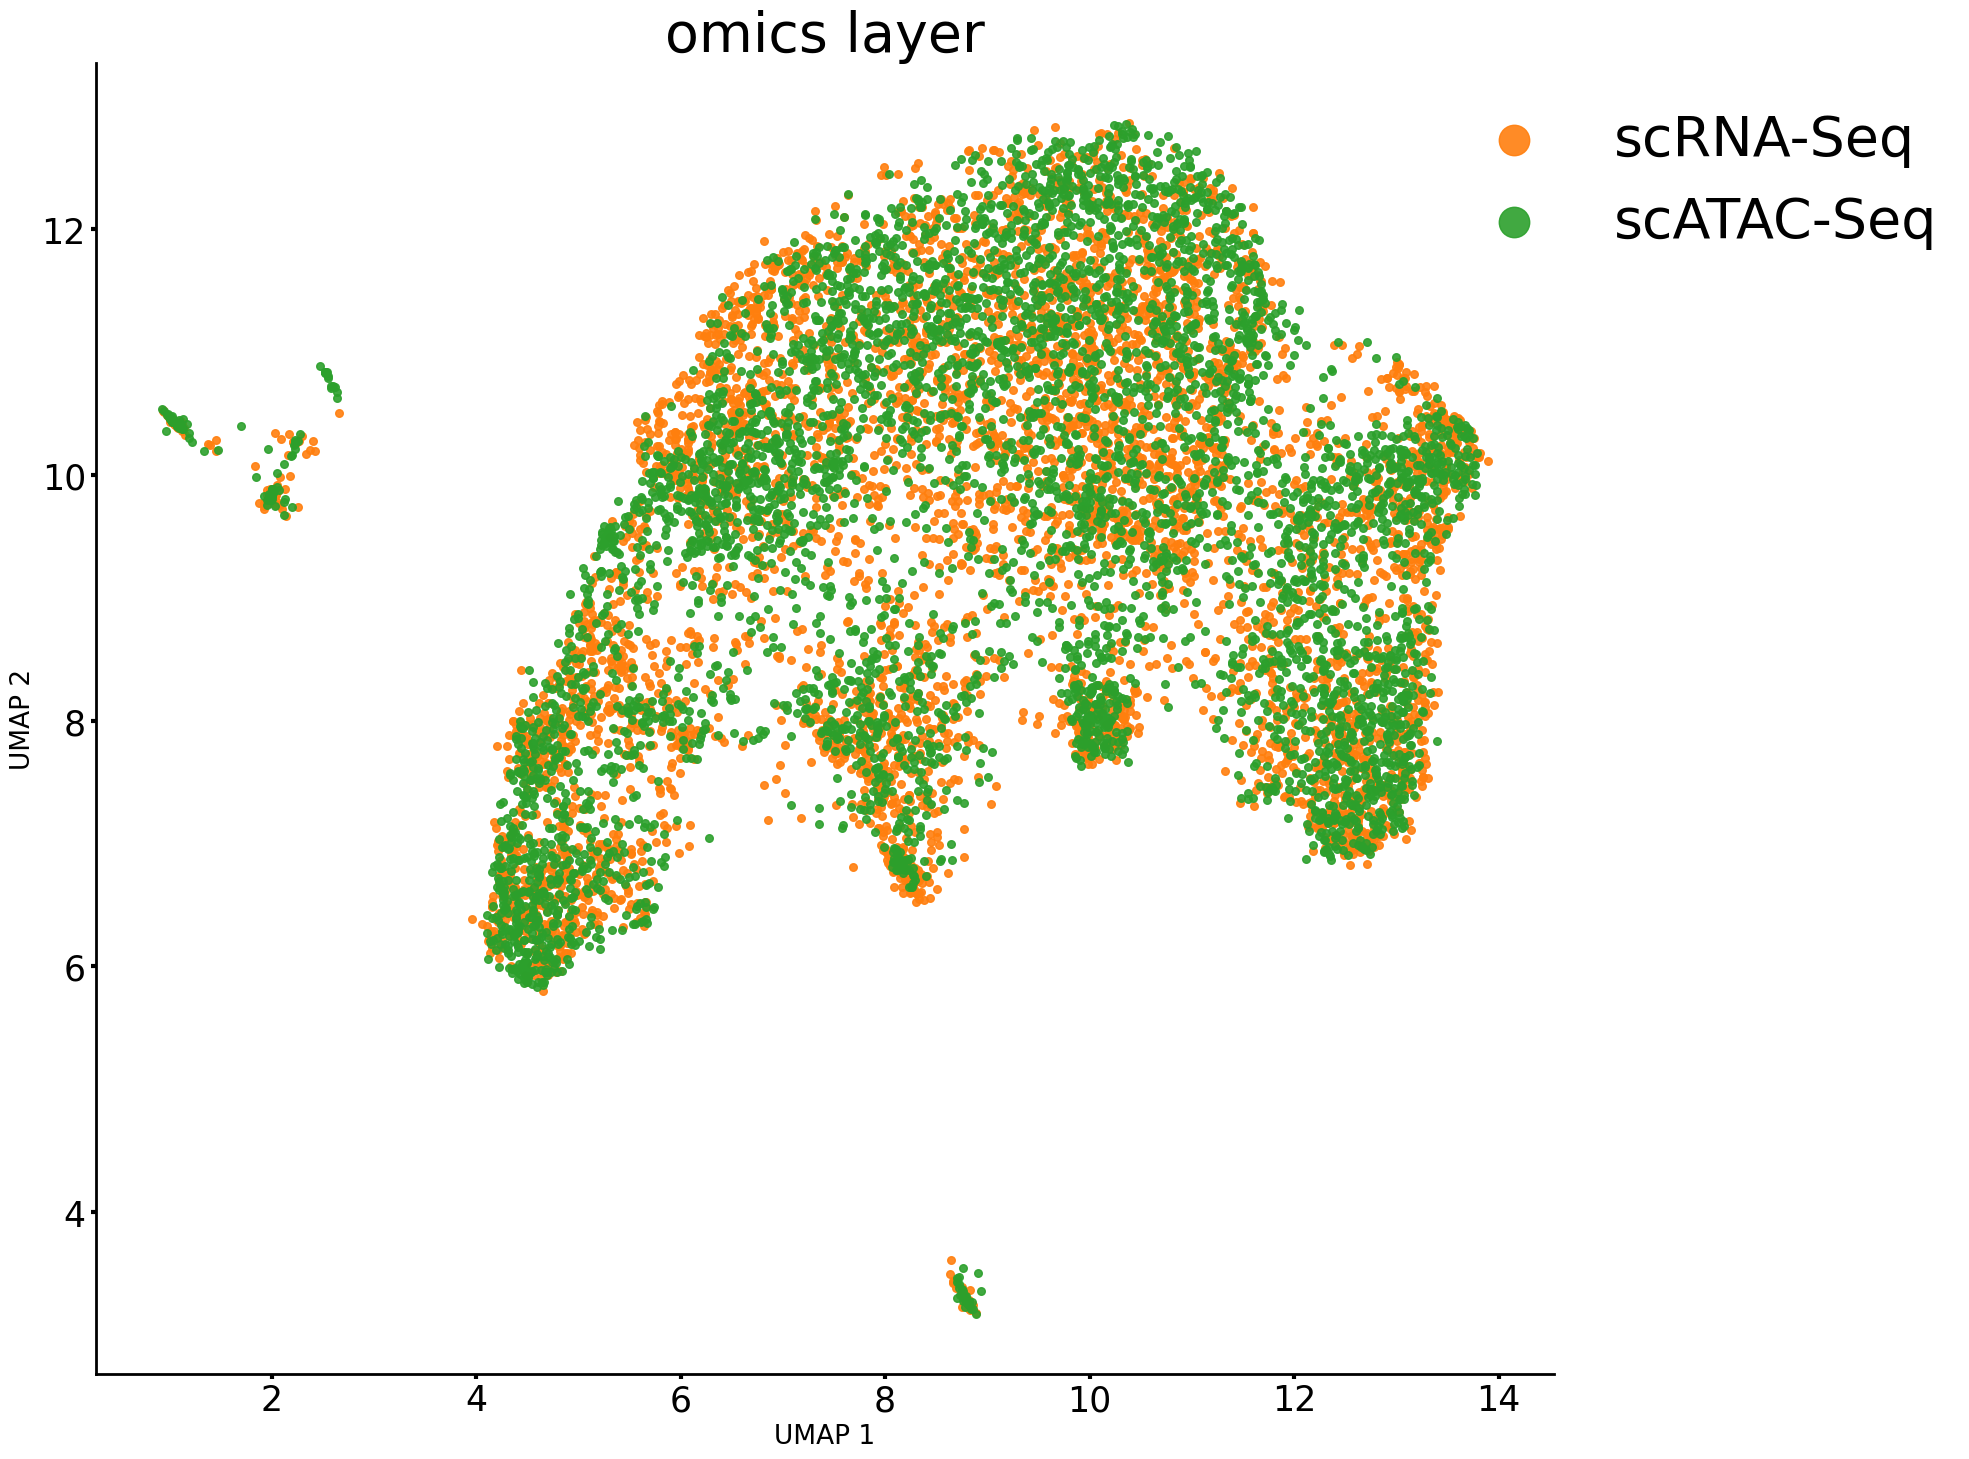

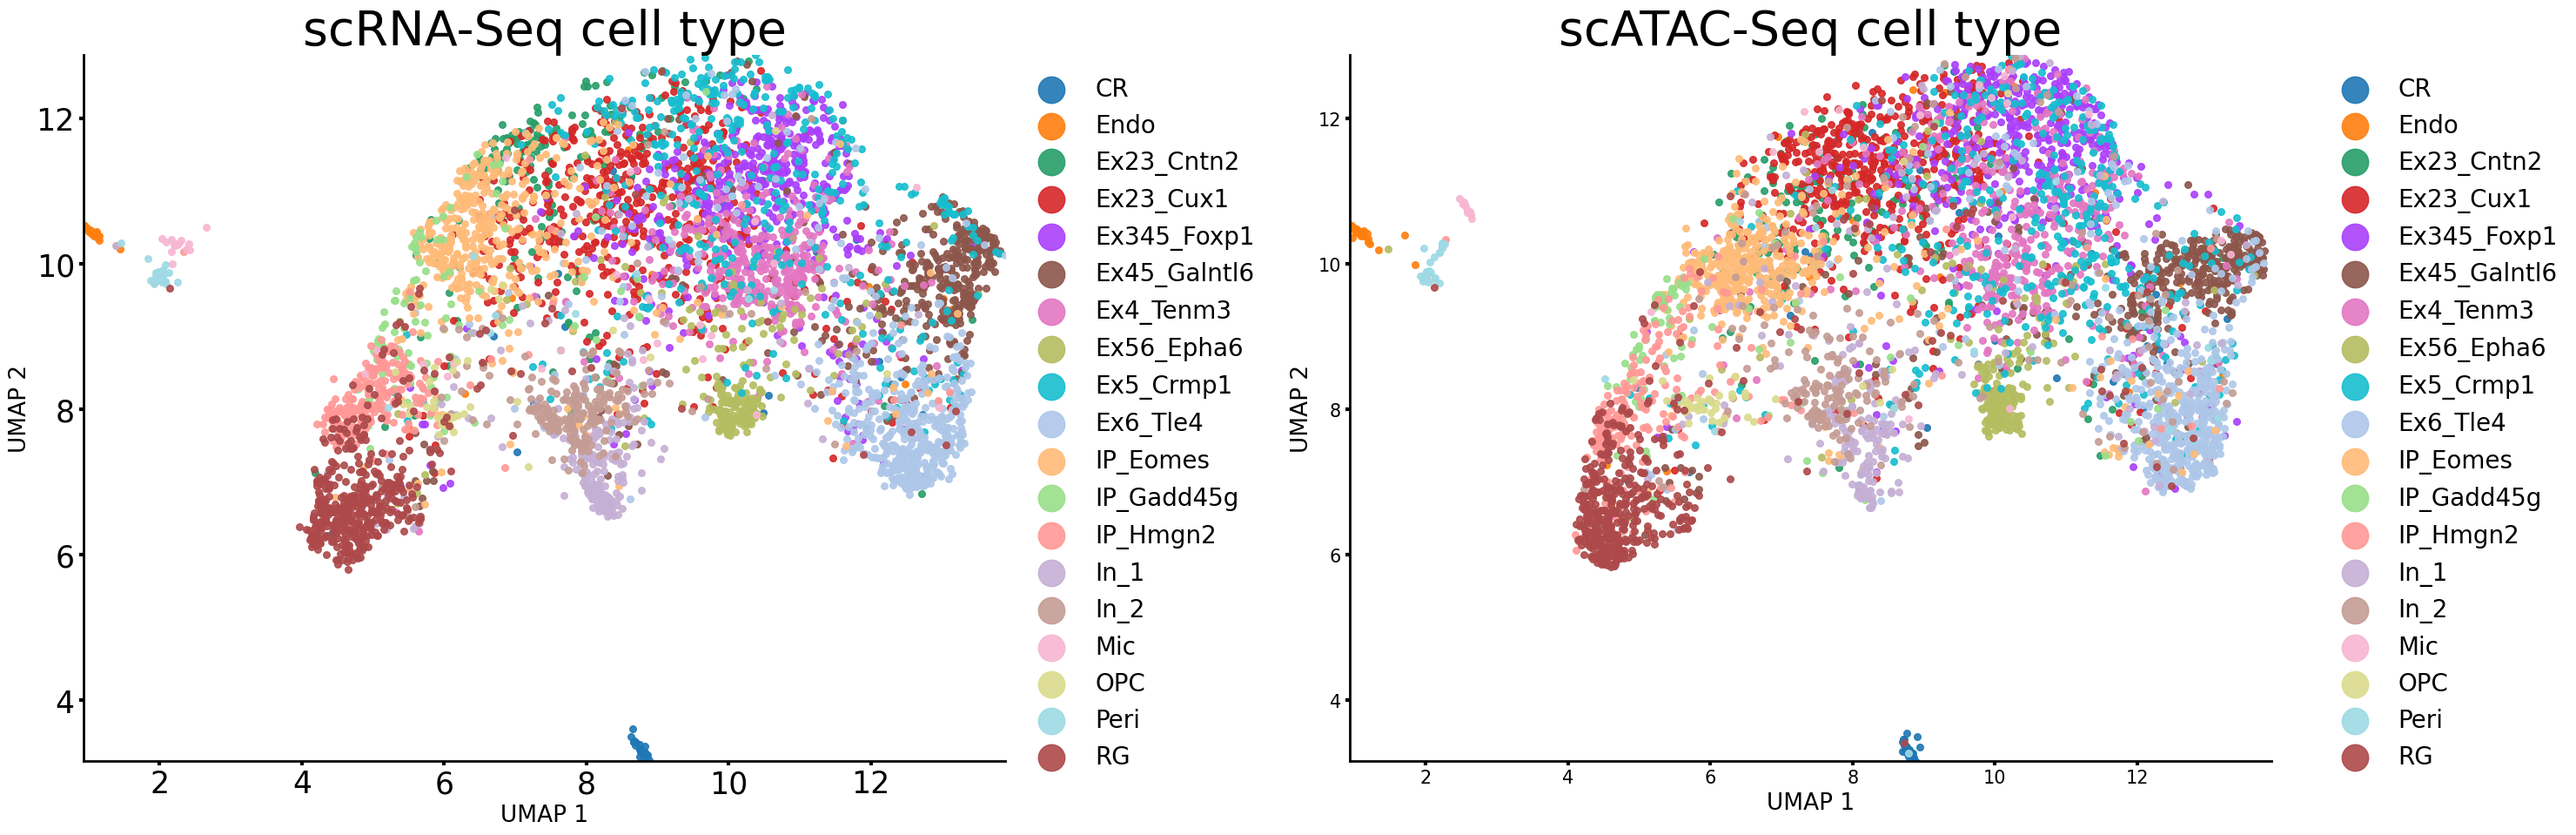

In [17]:
import os
import sys
sys.path.append("..")
import process_db
import h5py
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import random
import TI as ti
import scanpy as sc
random.seed(1)

plt.rcParams["font.size"] = 20
import utils as utils
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

dir = "/home/xcx/results/"
result_dir = dir

methods = ["1-scDART", "2-Union-com", "3-MMD-MA", "4-scJoint", "5-scMVP", "6-Harmony", \
           "7-Seurat", "8-Liger", "9-cobolt", "10-MOFA+", "11-MultiVI", "12-GLUE"]
datasets = ["P0", "1469", "uterus"]

method_num = 11
dataset_num = 0

method = methods[method_num]
dataset = datasets[dataset_num]

if method == "8-Liger":
    rna_embeddings = pd.read_csv(dir + dataset + "/" +  method + "/z_rna.csv", header = 0, index_col=0).values
    atac_embeddings = pd.read_csv(dir + dataset + "/" + method + "/z_atac.csv", header = 0, index_col=0).values
elif method == "4-scJoint":
    if dataset == "uterus":
        rna_embeddings = pd.read_csv(dir + dataset + "/" +  method + "/binary_counts_rna_embeddings.txt", sep=" ", header = None).values
        atac_embeddings = pd.read_csv(dir + dataset + "/" + method + "/binary_counts_atac_embeddings.txt", sep=" ", header = None).values 
    else:
        rna_embeddings = pd.read_csv(dir + dataset + "/" +  method + "/binary_counts_rna_embeddings.txt", sep=" ", header = None).values
        atac_embeddings = pd.read_csv(dir + dataset + "/" + method + "/binary_gene_activity_atac_embeddings.txt", sep=" ", header = None).values    
elif method == "5-scMVP":
    rna_embeddings = pd.read_csv(dir + dataset + "/" +  method + "/z_both.csv", header = 0).values
    atac_embeddings = pd.read_csv(dir + dataset + "/" + method + "/z_both.csv", header = 0).values
elif method == "10-MOFA+":
    rna_embeddings = pd.read_csv(dir + dataset + "/" +  method + "/z_both.csv", header = 0).values
    atac_embeddings = pd.read_csv(dir + dataset + "/" + method + "/z_both.csv", header = 0).values    
elif method == "11-MultiVI":
    if dataset == "P0":
        n = 5081
        rna_embeddings = pd.read_csv(dir + dataset + "/" +  method + "/multivi/binary_multivi_result.csv", header = 0, index_col=0).values[n:n+4065,:13].astype(float)
        atac_embeddings = pd.read_csv(dir + dataset + "/" +  method + "/multivi/binary_multivi_result.csv", header = 0, index_col=0).values[n+4065:,:13].astype(float)
    elif dataset == "1469":
        n = 1469
        rna_embeddings = pd.read_csv(dir + dataset + "/" +  method + "/multivi/binary_multivi_result.csv", header = 0, index_col=0).values[n:n+1176,:6].astype(float)
        atac_embeddings = pd.read_csv(dir + dataset + "/" +  method + "/multivi/binary_multivi_result.csv", header = 0, index_col=0).values[n+1176:,:6].astype(float)
elif method == "9-cobolt":
    rna_embeddings = pd.read_csv(dir + dataset + "/" +  method + "/z_rna.csv", header = 0).values
    atac_embeddings = pd.read_csv(dir + dataset + "/" + method + "/z_atac.csv", header = 0).values
else:
    rna_embeddings = pd.read_csv(dir + dataset + "/" +  method + "/z_rna.csv", header = 0).values
    atac_embeddings = pd.read_csv(dir + dataset + "/" + method + "/z_atac.csv", header = 0).values

print(rna_embeddings.shape)
print(atac_embeddings.shape)

embeddings =  np.concatenate((rna_embeddings, atac_embeddings))
print(embeddings.shape)

if dataset == "P0":
    if method == "9-cobolt" or method == "11-MultiVI":
        label_rna = pd.read_csv("/home/xcx/MYBenchmark-codes/" + method + "/mydata/P0/labels.csv", header = 0).to_numpy()[:,0]
        label_atac = pd.read_csv("/home/xcx/MYBenchmark-codes/" + method + "/mydata/P0/labels.csv", header = 0).to_numpy()[:,0]
    else:
        label_rna = pd.read_csv('/home/xcx/MYBenchmark-datas/P0/cell_label.csv', index_col=0).to_numpy()[:,0]
        label_atac = pd.read_csv('/home/xcx/MYBenchmark-datas/P0/cell_label.csv', index_col=0).to_numpy()[:,0]
elif dataset == "1469":
    if method == "8-Liger":
        label_rna = pd.read_csv("/home/xcx/results/1469/8-Liger/label.rna.csv", index_col=False).to_numpy()[:,1]
        label_atac = pd.read_csv("/home/xcx/results/1469/8-Liger/label.atac.csv", index_col=False).to_numpy()[:,1]
    elif method == "5-scMVP":
        label_rna = pd.read_csv("/home/xcx/MYBenchmark-codes/5-scMVP/mydata/1469/labels.csv", header = 0).to_numpy()[:,0]
        label_atac = pd.read_csv("/home/xcx/MYBenchmark-codes/5-scMVP/mydata/1469/labels.csv", header = 0).to_numpy()[:,0]
    elif method == "9-cobolt" or method == "11-MultiVI":
        label_rna = pd.read_csv("/home/xcx/MYBenchmark-codes/" + method + "/mydata/1469/labels.csv", header = 0).to_numpy()[:,0]
        label_atac = pd.read_csv("/home/xcx/MYBenchmark-codes/" + method + "/mydata/1469/labels.csv", header = 0).to_numpy()[:,0]       
    else:
        label_rna = pd.read_csv("/home/xcx/MYBenchmark-datas/1469/anno.txt", header = None).to_numpy()[:,0]
        label_atac = pd.read_csv("/home/xcx/MYBenchmark-datas/1469/anno.txt", header = None).to_numpy()[:,0]
elif dataset == "uterus":
    label_rna = sc.read("/data1/xcx/unpaired-data/uterus/RNA/Uterus_Wang_2020_selected.h5ad", cache = True).obs["cell_type"].values
    label_atac = sc.read("/data1/xcx/unpaired-data/uterus/ATAC/uterus_Zhang2021/adata_anno_selected.h5ad", cache = True).obs["celltype"].values

# UMAP

import utils as utils
from sklearn.decomposition import PCA
import torch
from sklearn.manifold import MDS
from umap import UMAP

z_rna = torch.from_numpy(rna_embeddings)
z_atac = torch.from_numpy(atac_embeddings)

# Configure UMAP hyperparameters
UMAP_reducer = UMAP(n_neighbors=15, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
               n_components=2, # default 2, The dimension of the space to embed into.
               metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
               # n_epochs=1000, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
               learning_rate=1.0, # default 1.0, The initial learning rate for the embedding optimization.
               init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
               min_dist=0.1, # default 0.1, The effective minimum distance between embedded points.
               spread=1.0, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
               low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
               set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
               local_connectivity=1, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
               repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
               negative_sample_rate=5, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
               transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
               a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               # random_state=42, # default: None, If int, random_state is the seed used by the random number generator;
               metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
               angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
               target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
               #target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
               #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
               #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
               transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
               verbose=False, # default False, Controls verbosity of logging.
               unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
              )

# Fit and transform the data
z = UMAP_reducer.fit_transform(np.concatenate((z_rna, z_atac), axis = 0))
z_rna_pca = z[:z_rna.shape[0],:]
z_atac_pca = z[z_rna.shape[0]:,:]
print(z_rna_pca.shape)
print(z_atac_pca.shape)

result_dir = "/home/xcx/photos/pdf/"

if dataset == "P0":
    if method == "5-scMVP" or method == "10-MOFA+":
        plt.rcParams["font.size"] = 20
        utils.plot_latent(z1 = z_rna_pca, z2 = z_atac_pca, anno1 = label_rna, 
                            anno2 = label_atac, mode = "one", save = result_dir + dataset +"/" + method + "_UMAP_separate.pdf", 
                            figsize = (20, 15), axis_label = "UMAP", colors = colors_scanpy) 
    else:
        plt.rcParams["font.size"] = 20
        utils.plot_latent(z1 = z_rna_pca, z2 = z_atac_pca, anno1 = label_rna, 
                            anno2 = label_atac, mode = "modality", save = result_dir + dataset +"/" + method + "_UMAP_modality.pdf", 
                            figsize = (20,15), axis_label = "UMAP", colors = colors_scanpy)
        plt.rcParams["font.size"] = 20
        utils.plot_latent(z1 = z_rna_pca, z2 = z_atac_pca, anno1 = label_rna, 
                            anno2 = label_atac, mode = "separate", save = result_dir + dataset +"/" + method + "_UMAP_separate.pdf", 
                            figsize = (30,10), axis_label = "UMAP", colors = colors_scanpy)
    
if dataset == "uterus":
    plt.rcParams["font.size"] = 20
    utils.plot_latent(z1 = z_atac_pca, z2 = z_rna_pca, anno1 = label_atac, 
                        anno2 = label_rna, mode = "modality_1", save = result_dir + dataset +"/" + method + "_UMAP_modality.pdf", 
                        figsize = (20,15), axis_label = "UMAP")
    plt.rcParams["font.size"] = 20
    utils.plot_latent(z1 = z_rna_pca, z2 = z_atac_pca, anno1 = label_rna, 
                        anno2 = label_atac, mode = "separate", save = result_dir + dataset +"/" + method + "_UMAP_separate.pdf", 
                        figsize = (30,10), axis_label = "UMAP")

elif dataset == "1469":
    if method == "5-scMVP" or method == "10-MOFA+":
        plt.rcParams["font.size"] = 20
        utils.plot_latent(z1 = z_rna_pca, z2 = z_atac_pca, anno1 = label_rna, 
                            anno2 = label_atac, mode = "one", save = result_dir + dataset +"/" + method + "_UMAP_separate.pdf", 
                            figsize = (20,15), axis_label = "UMAP")
        plt.rcParams["font.size"] = 20
        utils.plot_latent(z1 = z_rna_pca, z2 = z_atac_pca, anno1 = label_rna, 
                            anno2 = label_atac, mode = "joint", save = result_dir + dataset +"/" + method + "_UMAP_joint.pdf", 
                            figsize = (20,15), axis_label = "UMAP")
    else:
        plt.rcParams["font.size"] = 20
        utils.plot_latent(z1 = z_rna_pca, z2 = z_atac_pca, anno1 = label_rna, 
                            anno2 = label_atac, mode = "modality", save = result_dir + dataset +"/" + method + "_UMAP_modality.pdf", 
                            figsize = (20,15), axis_label = "UMAP")
        plt.rcParams["font.size"] = 20
        utils.plot_latent(z1 = z_rna_pca, z2 = z_atac_pca, anno1 = label_rna, 
                            anno2 = label_atac, mode = "separate", save = result_dir + dataset +"/" + method + "_UMAP_separate.pdf", 
                            figsize = (30,10), axis_label = "UMAP")
        plt.rcParams["font.size"] = 20
        utils.plot_latent(z1 = z_rna_pca, z2 = z_atac_pca, anno1 = label_rna, 
                            anno2 = label_atac, mode = "joint", save = result_dir + dataset +"/" + method + "_UMAP_joint.pdf", 
                            figsize = (20,15), axis_label = "UMAP")